In the case of real quadratic fields, our assumption is $1-\beta\leq \frac{0.15\log d}{\sqrt{d}}$ and $d\geq 400000$.

In [13]:
print('beta >', n(1-0.15*log(400000)/sqrt(400000)))

beta > 0.996940681398277


We round this up to the third digit, i.e. $\beta>0.996$.

In [16]:
assump=0.996
assump2=assump^2
assump34=(3-assump)*(4-assump)

print('beta^2 >', assump2)
print('(3-beta)(4-beta)<', assump34)

beta^2 > 0.992016000000000
(3-beta)(4-beta)< 6.02001600000000


In [20]:
c1=N((2-assump)^2)
c2=N((3-assump)^2)

print(c1,'and',c2)

1.00801600000000 and 4.01601600000000


In [24]:
#J1
c0=0.992

J1=n(integral(abs(x*zeta(1-I*x))/sqrt((c0+x**2)*(c1+x**2)*(c2+x**2)), x, -3, 3)/(2*pi)); J1

0.196545821637456

In [25]:
J2=N(integral(abs(x*zeta(1-I*x)*log(e*(abs(x)+14/5)))/sqrt((c0+x^2)*(c1+x^2)*(c2+x^2)), x,-3,3)/(2*pi));J2

0.451193447476492

In [26]:
J3=N(integral(x*log(x)/sqrt((c0+x^2)*(c1+x^2)*(c2+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)));J3

0.208786149178279

In [29]:
J4=N(integral((x*log(x)*log(e*(x+14/5)))/sqrt((c0+x^2)*(c1+x^2)*(c2+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)));J4

0.818033034629299

In [30]:
J1J3=J1+J3
J2J4=J2+J4
print('J1+J3 is equal to',J1J3)
print('J2+J4 is equal to',J2J4)

J1+J3 is equal to 0.405331970815734
J2+J4 is equal to 1.26922648210579


In [35]:
upperJ=N((J1J3+(J2J4/log(400000)))/(2*pi)); upperJ

0.0801707329630602

$\textbf{Case 1}$

In [40]:
N(log(sqrt(400000)/2))

5.75646273248511

In [43]:
N(pi^2*1.122/36)

0.307602670500618

In [46]:
t1=N(2/(0.308*6.021))
t2=N((4*upperJ*0.15)/(0.308*5.756*2))
print(t1,'and',t2)

1.07847641479928 and 0.0135664309004032


$\textbf{Case 2}$

In [48]:
def Sigma(l):
    return 2*sum([1./k for k in [1..l] if is_prime_power(k)])

In [51]:
print('Sigma=', Sigma(16),'esigma=',N(e*Sigma(16)))

Sigma= 3.78526751026751 esigma= 10.2894238890166


In [52]:
def Err0(l):
    return 3.6/log(l)^2

In [53]:
n(1+2*log(2)+Err0(16))

2.85460238184615

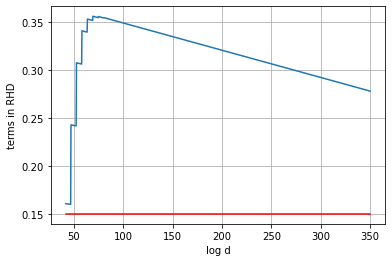

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def poscase2(t):
    k=ceil((t-log(16))/(2*log(16)))
    D2=(1.998/sqrt(2*pi))*((1+k)/(1+k-Sigma(16)))*(10.29/k)^k/sqrt(k)
    return N((1.078-(0.013/16)*t)/(2.854+D2))

Num=1000
x=np.linspace(42,350,num=Num)
y=[]
for t in x:
    z=poscase2(t)
    y.append(z)
w=0.15*np.ones(Num)
plt.plot(x,y)
plt.plot(x,w,'-',color='red')
plt.ylabel('terms in RHD')
plt.xlabel('log d')
plt.grid()
plt.show()

$\textbf{Case 3}$

In [67]:
lowerz=0.5*0.25*350; lowerz

43.7500000000000

In [69]:
N((sqrt(2*lowerz)-log(4))/log(lowerz))

2.10873806860269

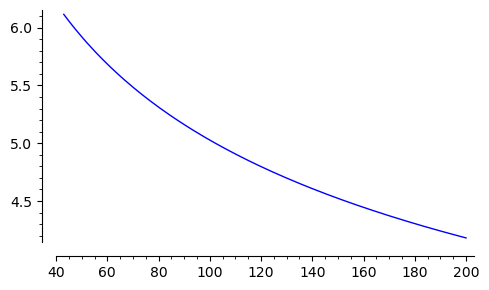

In [90]:
var('t')
plot(2*e*log(t)*(log(log(t))+1.034)/(sqrt(2*t)-log(4)), (t, 43, 200), figsize=[5,3])

In [71]:
upperesk0=N((e*log(lowerz)*(2*log(log(lowerz))+2.07))/(sqrt(2*lowerz)-log(4))); upperesk0

6.09549518664917

In [72]:
ks=N(1/(1-upperesk0/e)); ks

-0.804888983950897

In [85]:
d=N(1.998/sqrt(2*pi*3)*(ks)^3)
dd=N(1+2*log(2)+3.6/(log(lowerz))^2)
print('The denominator is ', d+dd)

The denominator is  2.39848044860326


In [87]:
(t1-8*t2)/(d+dd)

0.404399780769904